In [1]:
import sys, os
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns

sys.path.insert(1, '../scripts')
root = os.getcwd()


from TwintDataMiner import TwintDataMiner
from PandasDataCleaner import PandasDataCleaner
from TextBlobSentiment import TextBlobSentiment
from Visualisation import Visualisation

In [2]:
tweetsFile = "../data/tweets.csv"
tdm = TwintDataMiner()
#tdm.getAttribute("tweet", tweetsFile)

In [3]:
attributes = ["id", "tweet", "place", "time"]
df = tdm.getPandasDataFrame(attributes, tweetsFile)
df = df[:500]
#df.head


In [4]:
pdc = PandasDataCleaner()
#df = pdc.translate(df, 'tweet', 'translatedTweet')
df  = pdc.detectLanguage(df, 'tweet', 'lang')
df = pdc.cleanTweet(df, 'tweet')

In [5]:
#only use english language tweets
df = df.loc[df['lang'] == 'en']
df = df.reset_index(drop=True)
tbs = TextBlobSentiment()
df = tbs.addSentimentToDataframe(df, display=False)

    

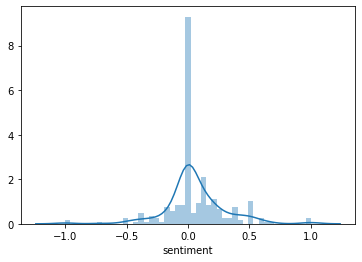

In [6]:
vis = Visualisation()
%matplotlib inline
vis.showDistribution(df, 'sentiment')

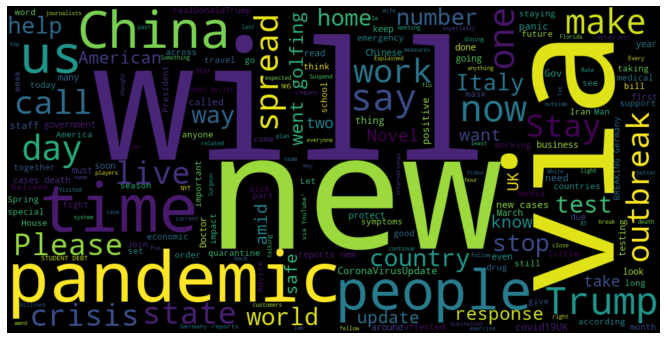

In [7]:
vis.showWordCloud(df, 'tweet')